# Iris Dataset

In [1]:
# Importing python libraries
import seaborn as sns

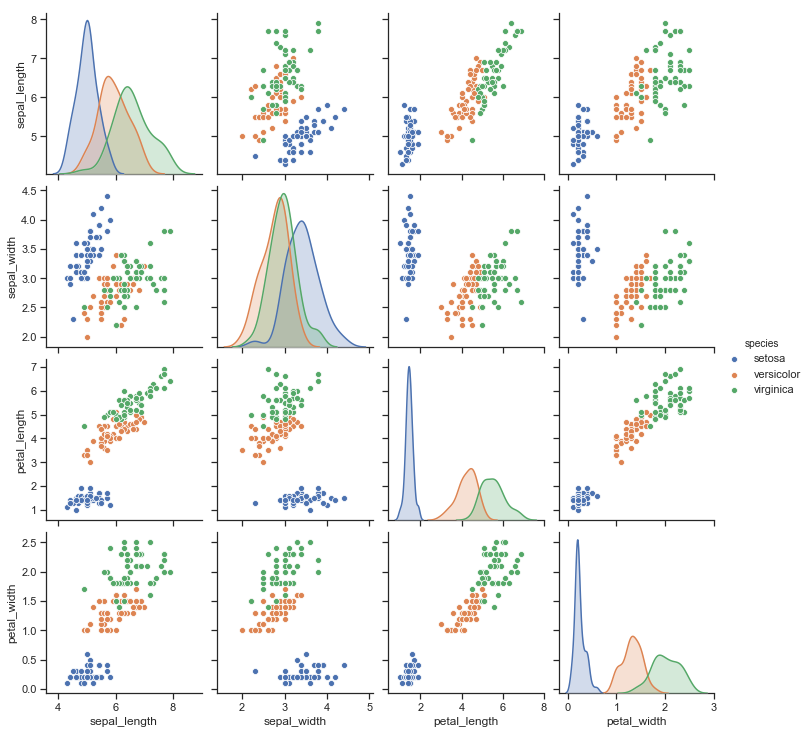

In [2]:
# Setting the style of plot
sns.set(style="ticks", color_codes=True)

# Loading iris dataset from seaborn
iris = sns.load_dataset("iris")

# Plotting scatter plots for different features
g = sns.pairplot(iris, hue="species")

Based on the scatter pair plot above between the 4 features of iris dataset, sepal length, speal width, petal length and petal width, we can differentiate between the 3 classes of iris. If we notice the graphs carefully, it can be inferred that the petal lenght and width can be used to predict the class of an iris flower correctly to a large extent. The setosa has a petal length between the range of 1-2 units approximately and a petal width between 0.0 - 0.5 units. Whereas, the petal size of versicolor and virginica is much bigger than setosa, making prediction of a setosa class iris flower easier. The petal length and petal width for versicolor lies between 3-5 units and 1.0-1.75 units respectively. Virginia has the biggest petal size with its petal length lying between 4.5-7 units and petal width between 1.75-2.0 units. Therefore, petal size can be used to distinguish between the 3 classes accurately to a great extent. 
If we observe the graphs for sepal length and width, we can observe that the sepal features cannot be used to correctly distinguish between the classes, especially the vericolor and virginica. Setosa has a distinguishing feature having a sepal which is shorter than others but at the same time wider as well. But, if we look at the sepal length and width for versicolor and virginica, both these classes have a similar kind and size of sepals making separating these 2 on the basis of sepal size difficult.

<b>Libraries Used</b>
1. Seaborn

<b>References</b>
1. https://seaborn.pydata.org/generated/seaborn.pairplot.html

## KNN

In [3]:
# Importing Python Libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Loading iris dataset
iris = load_iris()
X= iris.data
y=iris.target

# Splitting data into train, valid and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp,test_size=0.25,random_state=42)


In [5]:
# Initialising KNN Classifier
knn=KNeighborsClassifier()

# Training the data
knn.fit(X_train,y_train)

# Calculating testing accuracy before tuning of hyperparameter
y_new_predict=knn.predict(X_test)
step_2_result=metrics.accuracy_score(y_test,y_new_predict)
print (step_2_result)

0.9666666666666667


In [6]:
# Tuning of hyperparameter
k_range = [1]
k_range.extend(range(5,40,5))
score=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y1_predict=knn.predict(X_valid)
    score.append(metrics.accuracy_score(y_valid,y1_predict))
print(score)

[0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


Text(0, 0.5, 'Validation Accuracy')

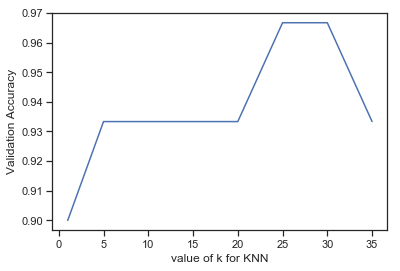

In [7]:
# Plotting Accuracy v/s Hyperparameter
%matplotlib inline
plt.plot(k_range,score)
plt.xlabel("value of k for KNN")
plt.ylabel("Validation Accuracy")

From the above grapth, it can be seen that validation accuracy increased with an increase in the value of K. It was minimum for k=0, but saw an increase for k=5 and remained at the same levels for k=10, 15, 20. Further, when the value of k reached 25 and 30, validation accuracy saw an increase again before dropping to earlier levels for k=35. As k increases, it looks for more points in neighborhood and hence increase the generalizability; larger values of K will have smoother decision boundaries which mean lower variance thus the accuracy on the unseen data increases. Therefore, we see an upward trend. 

But, this results in increased bias and a model with high bias pays very little attention to the training data and oversimplifies the model that is why we observed a dip in the graph at very high value of K (k=35).

Base on the graph above, the best value of k that should provide us the best validation accuracy should be k=30. Although, we get same accuracy for k=25 and k=30, but a higher value of k corresponds to lower variance. Therefore, among 25 and 30, I chose 30 as the value of my hyperparameter.

In [8]:
# Calculating testing accuracy after tuning of hyperparameter
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_new_predict=knn.predict(X_test)
step_4_result=metrics.accuracy_score(y_test,y_new_predict)
print (step_4_result)

1.0


Testing Accuracy = 1.0
It can seen that, the testing accuracy has increased from 0.97 to 1.0 after finding the best possible value of hyperparameter (K=30) by tuning it on the validation set.

<b>Libraries Used</b>
1. Sklearn
2. Matplotlib
3. KNeighborsClassifier
4. load_iris
5. Metrics
6. train_test_split

<b>References</b>
1. https://www.youtube.com/watch?v=RlQuVL6-qe8
2. https://realpython.com/python-matplotlib-guide/    

## SVM

In [9]:
# Importing Python Libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

In [10]:
# Loading iris dataset
iris = load_iris()
X= iris.data
y=iris.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [11]:
# Tuning of hyperparameter
C_values=[0.1, 0.5, 1, 2, 5, 10, 20, 50]
result =[]
for k in C_values:
    model=SVC(kernel='linear',C=k)
    scores=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
    result.append(scores.mean())  
print(result)

[0.9575757575757576, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9423076923076923, 0.933974358974359]


Text(0, 0.5, 'Mean Accuracy')

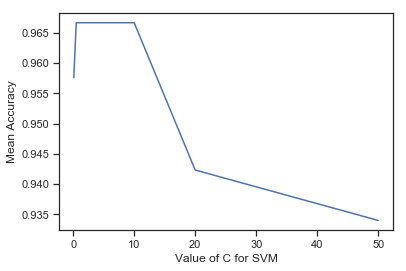

In [12]:
# Plotting Accuracy v/s Hyperparameter
%matplotlib inline
plt.plot(C_values,result)
plt.xlabel("Value of C for SVM")
plt.ylabel("Mean Accuracy")

From the above graph it can be seen that, generally, as the value of C increases, the value of mean accuracy drops. It takes a maxima at k= 0.1, remains constant at 0.966 till k=10. Then there is a sharp reduction in the value of mean accuracy even with a small increment in k. The value of mean accuracy drops to 0.942 for k=20. After that, although the drop continues, but it is less significant reaching 0.93 at k=50.

The value of mean accuracy is same for the followning values of C, 0.1, 0.5, 1, 2, 5 and 10. However, a small value of C will cause the optimizer to look for a larger-margin separating hyperplane which will produce better results. Therefore, among these values, I have chosen k=0.1 as the value of hyperparameter that should provide the best results.

In [13]:
# Calculating testing accuracy after tuning of hyperparameter
model=SVC(C=0.1,kernel='linear')
model.fit(X_train,y_train)
testing_accuracy=model.score(X_test,y_test)
print(testing_accuracy)

1.0


Testing Accuracy = 1.0
After determining the most suitable value for C using cross validation, it has been used to above to calculate the testing accuracy on the test set.

<b>Libraries Used</b>
1. Sklearn
2. load_iris
3. Matplotlib
4. SVC
5. Metrics
6. train_test_split
7. cross_val_score

<b>References</b>
1. www.youtube.com/watch?v=FB5EdxAGxQg
2. www.kaggle.com/arshid/support-vector-machine-on-iris-flower-dataset

## Tree-based Classifiers

In [14]:
#Importing python Libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## <b> 1) Decision Tree </b>

In [15]:
#Load Data Set
iris = load_iris()
X= iris.data
y=iris.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [16]:
# Tuning the hyperparameter
values=[3,5,10,None] 
results=[]
graph=[3,5,10,'None']
for i in values:
    model=tree.DecisionTreeClassifier(max_depth=i,random_state=42)
    score=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean()
    results.append(score)
print(results)

[0.9332167832167831, 0.908216783216783, 0.9248834498834497, 0.9248834498834497]


Text(0, 0.5, 'Mean Accuracy')

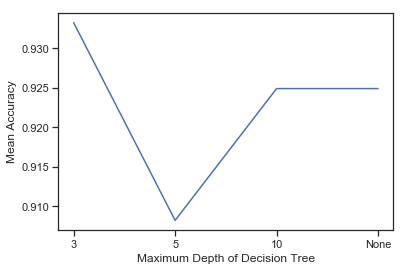

In [17]:
# Plotting Mean Accuracy v/s Maximum Depth
%matplotlib inline
#plt.plot(values,results)
plt.plot(graph,results)
plt.xlabel("Maximum Depth of Decision Tree")
plt.ylabel("Mean Accuracy")

It can be seen from the grapth above that as the value of max_depth increased, the mean accuracy value dropped. It reached the maximum value of 0.934 max_depth 3 and dropped at more then 3. After hitting its minimum value at 5 it sae a rise again and then became constant after that.
I think if you increase max_depth, the tree might will overfit the training data, and in doing so it will miss useful patterns as we would like to make our model predict efficiently. But, a shallow tree i.e. a lower value of max_depth will imply a less complex and simple model which will give better results with the testing data.

Therefore, max_depth = 3 should give the best results

In [18]:
#Calculating testing accuracy after tuning of hyperparameter
model_new=tree.DecisionTreeClassifier(max_depth=3,random_state=42)
model_new.fit(X_train,y_train)
testing_accuracy=model_new.score(X_test,y_test)
print(testing_accuracy)

1.0


Testing Accuracy = 1.0
After tuning the hyperparameter max_depth using cross validation, the testing accuracy has been calculated which seems to be quite efficient to provide best results.

## <b> 2) Random Forest </b>

In [19]:
# Tuning of Hyperparameters
No_of_Trees = [5, 10, 50, 150, 200]
depth_values_for_graph = [3, 5, 10, 'None']    
depth_values = [3, 5, 10, None]
results_random = []
for k in depth_values:
    result_temp=[]
    for l in No_of_Trees:
        model_random = RandomForestClassifier(n_estimators = l, max_depth = k, random_state=42)
        score=cross_val_score(model_random,X_train,y_train,cv=10,scoring='accuracy').mean()
        result_temp.append(score)
    results_random.append(result_temp)
print(results_random)

[[0.9248834498834497, 0.9332167832167831, 0.9415501165501163, 0.9415501165501163, 0.9415501165501163], [0.9248834498834497, 0.9248834498834497, 0.9332167832167831, 0.9248834498834497, 0.9332167832167831], [0.9248834498834497, 0.9248834498834497, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497], [0.9248834498834497, 0.9248834498834497, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497]]


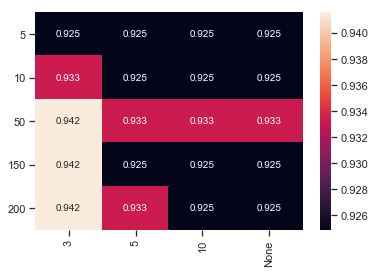

In [20]:
# Plot Heatmap for Mean Accuracy using parameters max_depth and n_estimators
df = pd.DataFrame(data=results_random, index=depth_values_for_graph, columns=No_of_Trees)
ax = sns.heatmap(df.T,annot=True,fmt=".3")

for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

From the heat plot above, it can be observed that similar to decision tree, a random forest model also gives the best results at a lower value of max_depth. Here also the best mean accuracy has been obtained for k=3. As the value of max_depth increased, the mean accuracy value dropped. But, in random forest model there is one more hyperparameter i.e. n_estimators which affects the predictability of the model. The heat plot tells us that a higher value of n_estimators correspond to a better mean accuracy. Per my understanding this happens as the higher the number of trees makes it better to learn the data. More the number of trees, more collaborative results will be provided reducing the errors.

However, I also observed that adding a lot of trees slows down the training process considerably. The convergence speed increases significantly. The mean accuracy obtained for 50 and 200 was almost same but a value of 200 corresponded to a much higher computation time. Therefore, it can be concluded that beyond a certain point, the tradeoff may not be worth it.

Therefore, the most suitable values for max_depth and n_estimators should be 3 and 50 respectively.


In [21]:
# Calculating Testing Accuracy after tuning of hyperparameters
model_new_random=RandomForestClassifier(n_estimators =50, max_depth = 3, random_state=42)
model_new_random.fit(X_train,y_train)
testing_accuracy_random=model_new_random.score(X_test,y_test)
print(testing_accuracy_random)

1.0


Testing Accuracy = 1.0
After tuning the hyperparameters max_depth and n_estimators for random forest model and determining the best suitable values for both these parameters, testing accuracy has been calculated which seems to be providing efficient results.

## <b> 3) Gradient Tree Boosting</b>

In [22]:
# Tuning of hyperparameter
No_of_Trees = [5, 10, 50, 150, 200]
results_gradient = []
for k in No_of_Trees:
        model= GradientBoostingClassifier(n_estimators = k, random_state=42)
        score=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean()
        results_gradient.append(score)
print(results_gradient)

[0.9325757575757574, 0.9325757575757574, 0.9332167832167831, 0.9248834498834497, 0.9248834498834497]


Text(0, 0.5, 'Mean Accuracy')

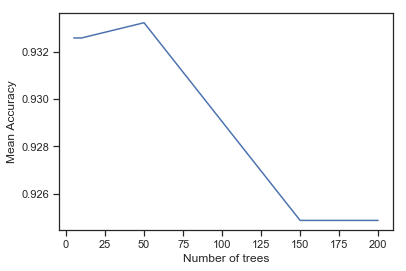

In [23]:
#Plotting Number of trees v/s Mean Accuracy
%matplotlib inline
plt.plot(No_of_Trees,results_gradient)
plt.xlabel("Number of trees")
plt.ylabel("Mean Accuracy")

From the plot above, it can be noticed that while tuning the hyperparameter n_estimators for Gradient Boosting model, a similar pattern as of random forest was observed; a higher value of n_estimators corresponded to a better mean accuracy. The value of mean accuracy was aroung 0.9325 for n_estimators = 5 which increased after that reaching a maxima at n_estimators = 50. This might have happened as more the number of trees, more collaborative results will be provided reducing the errors. 

However, when the number of trees was further increased from 50, a downward trend was observed. This indicates overfitting of the model at large values thus dropping the value of accuracy. I also observed that adding a lot of trees slows down the training process considerably.

Therefore, the suitable value for n_estimators in 50 which should provide us best predictive results.

In [24]:
# Calculating Testing Accuracy after tuning of hyperparameter
model_new_gradient=GradientBoostingClassifier(n_estimators =50, random_state=42)
model_new_gradient.fit(X_train,y_train)
testing_accuracy_gradient=model_new_gradient.score(X_test,y_test)
print(testing_accuracy_gradient)

1.0


Testing Accuracy = 1.0
After tuning the hyperparameter for gradient boosting model using cross validation, the testing accuracy has been calculated on the test set.

<b>Libraries Used</b>
1. sklearn
2. load_iris
3. Tree
4. RandomForestClassifier
5. GradientBoostingClassifier
6. Seaborn
7. Numpy
8. Panda
9. Matplotlib
10. Metrics
11. train_test_split
12. cross_val_score

<b>References</b>
1. www.youtube.com/watch?v=PHxYNGo8Ncl&t=745s
2. www.youtube.com/watch?v=ok2s1vV9XW0
3. www.youtube.com/watch?v=ErDgauqnTHk
4. www.scikit-learn.org/stable/modules/tree.html

## Analysis

<b> 1) Explain why you had to split the dataset into train and test sets? </b> <br>
Ans. There was a need to split the dataset into two sets so that the machine 
learning model could be trained with different data and then tested with different data. It is not advisable to use the entire dataset for both the operations i.e training and testing because:<br>
1.Goal is to estimate likely performance of a model on out-of-sample data<br>
2.But, maximizing training accuracy rewards overly complex models that won't necessarily generalize<br>
3.Unnecessarily complex models overfit the training data<br>
But when we divide the data in two sets i.e train and test set we overcome this limitation and achieve better and fair predictions.



<b> 2) Explain why when finding the best parameters for KNN you didn’t evaluate directly on the test set and had to use a validation test. </b> <br>
Ans. While finding the best parameter for KNN, apart from the train and test 
set, a third set called as the validation set is also used. It is necessary to have a validation set in addition to the other 2 sets to avoid overfitting of the model i.e.using a validation set avoids problems of adaptation tothe test set with repeated testing.The validation set is used to fine-tune models,compare their performances and select a model among different models. Now, the test set is independent of the training data and the validation data and was not used in model building process, therefore, the accuracy of the model on the test data gives a realistic estimate of the performance of the model on completely unseen data and provides an estimate of the actual predictive power of the model.


<b> 3) What was the effect of changing k for KNN. Was the accuracy always affected the same way with an increase of k? Why do you think this happened?</b><br>
Ans. With the increase of K, the following pattern was noticed. For most of the graph, the testing accuracy increased with an increase in the value of K. It got constant at certain intervals but never dropped unless it reached a maximum and then dropped again. Per my understanding such a pattern was observed as:
A less value of k means increased variance. Variance implies an algorithm’s sensitivity to specific sets of training data. When we choose to put k=1, the algorithm will look for only one nearest point in neighborhood and hence be more sensitive to the specificity of training data. In other words, model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.However, as you increase K, it will look for more points in neighborhood and hence increase the generalizability at the cost of variance; larger values of K will have smoother decision boundaries which mean lower variance thus the accuracy on the unseen data also increases. But, this results in increased bias. This is because the larger you make k, the more smoothing takes place, and eventually you will smooth so much that you will get a model that under-fits the data rather than over-fitting it. High bias can cause an algorithm to miss the relevant relations between features and target outputs. In other words, model with high bias pays very little attention to the training data and oversimplifies the model that is why we observed a dip in the graph at very high value of K.

To generalize this,<br> 
large K = simple model = underfit = low variance & high bias<br>
small K = complex model =overfit = high variance& low bias


<b>4) What was the relative effect of changing the max depths for decision tree,random forests, and gradient boosting? Explain the reason for this.</b><br>
Ans. As the value of max_depth increased, the mean accuracy value dropped. It was observed to be maximum at value 3 and dropped at more then 3. I think it is possible to happen if the complexity has simutaneously increased as according to the bias-variance trade off, increasing the model complexity may overfit the training set modeling even the noise. Therefore, a deeper decision tree implies in a model more complexity than a shallow decision.

Although, If you increase max_depth, training error will always go down because the tree might will overfit the training data, and in doing so it will miss useful patterns as we would like to make our model predict efficiently; this will cause testing error to increase.

But, a shallow tree i.e. a lower value of max_depth will imply a less complex and simple model which will give better results with the testing data.



<b>5) What was the relative effect of changing the number of tree depths for random forests, and gradient boosting? Explain the reason for this.</b><br>
Ans. gradient: n_estimators represents the number of trees in the forest.

While tuning this hyperparameter for Random Forests and Gradient Boosting models,it was observed that a higher value of n_estimators corresponded to a better mean accuracy. Per my understanding this happens as the higher the number of trees makes it better to learn the data. More the number of trees, more collaborative results will be provided reducing the errors. The more uncorrelated trees in our forest, the closer their individual errors get to averaging out.

However, I also observed that adding a lot of trees slows down the training process considerably. The mean accuracy obtained for 50 and 200 was almost same but a value of 200 corresponded to a much higher computation time. Therefore, it can be concluded that beyond a certain point, the tradeoff may not be worth it.



<b>6) What does the parameter C define in the SVM classifier? What effect did you observe and why do you think this happened?</b><br>
Ans. C in the SVM Classifier is a regularization parameter that controls the trade-off between achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data.<br>
Large Value of parameter C => small margin <br>
Small Value of parameter C => Large margin<br>
Although, there is no rule of thumb to choose a C value, it totally depends on thetesting data. The only option is trying bunch of different values and choose the value which gives you lowest misclassification rate on testing data. 

The observed effect of C on testing accuracy of SVM Classifier for iris data set was such that, low values of C provided higher testing accuracy and as the value of C increased, the accuracy dipped. Per my understanding, such a behavior was observed since with a high C value, the algorithm will try very hard to reduce the error in the training phase and, to achieve this, a complex surface (hyperplane) will be formed to separate the classes. If this surface is too complex, the classifier is likely have a very good performance on the training data and lose in terms of generalization, resulting in a poor performance on the test set i.e. overfitting which corresponds to low bias and high variance. 
Whereas a small C gives you higher bias and lower variance. A low C makes the decision surface smooth, and will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 
